# Plot WOT Cell wall signature over BR time series

In [1]:
library(tidyverse)
library(Seurat)
library(cowplot)
library(patchwork)
library(future)
library(ggridges)
library(grid)
#for 200gb ram 
options(future.globals.maxSize = 200000 * 1024^2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




In [2]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 16.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/tmnolan7/anaconda3/envs/r_4/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggridges_0.5.2     future_1.22.1      patchwork_1.1.0    cowplot_1.1.0     
 [5] SeuratObject_4.0.2 Seurat_4.0.5       forcats_0.5.0      stringr_1.4.0     
 [9] dplyr_1.0.7        purrr_0.3.4        readr_1.4.0        tidyr_1.1.4       
[13] tibble_3.1.5       ggplot2_3.3.5      ti

In [3]:
rc.integrated <- readRDS("../data/integrations/rc.integrated_14S_BR_Li_seu3_clean.rds")

In [4]:
rc.integrated

An object of class Seurat 
71231 features across 79982 samples within 3 assays 
Active assay: integrated (17732 features, 17732 variable features)
 2 other assays present: RNA, SCT
 4 dimensional reductions calculated: pca, umap, umap_3D, umap_2D

In [5]:
# subset the samples sc_43-sc_50 from the BR time course 

rc.integrated <- subset(rc.integrated, subset = sample %in% c("sc_43",
                                                                  "sc_44",
                                                                  "sc_45",
                                                                  "sc_46",
                                                                  "sc_47",
                                                                  "sc_48",
                                                                  "sc_49",
                                                                  "sc_50"))

In [6]:
rc.integrated$time_trt <- factor(rc.integrated$time_trt, levels=c("BRZ", "0.5_hour_BL", "1_hour_BL", "2_hour_BL" , "4_hour_BL" , "8_hour_BL"))

In [7]:
rc.integrated$time_trt <- fct_recode(rc.integrated$time_trt, 
           BRZ = "BRZ", 
           `BL 0.5 hour` = "0.5_hour_BL", 
          `BL 1 hour` = "1_hour_BL", 
          `BL 2 hour` = "2_hour_BL", 
          `BL 4 hour` = "4_hour_BL", 
          `BL 8 hour` = "8_hour_BL", )

In [8]:
table(rc.integrated$time_trt)


        BRZ BL 0.5 hour   BL 1 hour   BL 2 hour   BL 4 hour   BL 8 hour 
      13961        6843        6336       12485        6907        6389 

In [10]:
# add meta data
WOT_fates <- read_csv("../data/all-fates.csv")
wot <- WOT_fates$cell_wall
names(wot) <- WOT_fates$id_new
head(wot)
rc.integrated <- AddMetaData(
  object = rc.integrated,
  metadata = wot,
  col.name = 'Cell_Wall_Score')

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  X1 = col_character(),
  orig.id = col_character(),
  id_new = col_character()
)
ℹ Use `spec()` for the full column specifications.




AAACCCAAGCGATGGT_5 AAACCCAAGTGGTTCT_5 AAACCCACAAGCAATA_5 AAACCCACACAAGGTG_5 
       -0.30127373        -0.30359355        -0.35722002         0.01899919 
AAACCCACATATTCGG_5 AAACCCAGTAGATTGA_5 
       -0.28724885        -0.33092847

In [11]:
# extract timezone anno and cell wall score
(cw_scores <- data.frame(time_trt=rc.integrated$time_trt, 
                       time_anno=rc.integrated$time_zone, 
                       cell_type=rc.integrated$cell_type,
                       Cell_Wall_Score=rc.integrated$Cell_Wall_Score))

,time_trt,time_anno,cell_type,Cell_Wall_Score
,<fct>,<chr>,<fct>,<dbl>
AAACCCAAGCGATGGT_5,BRZ,Elongation,Endodermis,-0.30127373
AAACCCAAGTGGTTCT_5,BRZ,Elongation,Procambium,-0.30359355
AAACCCACAAGCAATA_5,BRZ,Maturation,Cortex,-0.35722002
AAACCCACACAAGGTG_5,BRZ,Transition Domain,Trichoblast,0.01899919
AAACCCACATATTCGG_5,BRZ,Elongation,Trichoblast,-0.28724885
AAACCCAGTAGATTGA_5,BRZ,Elongation,Pericycle,-0.33092847
AAACCCAGTCGTGGAA_5,BRZ,Elongation,Pericycle,-0.20110777
AAACCCATCACTTGTT_5,BRZ,Maturation,Endodermis,-0.37109464
AAACCCATCATTTGGG_5,BRZ,Maturation,Atrichoblast,-0.22413264


In [12]:
(cw_scores <- mutate(cw_scores, cortex_or_not = case_when(cell_type =="Cortex" ~ "Cortex",  
                                       TRUE ~ "Other Cell Types")))


,time_trt,time_anno,cell_type,Cell_Wall_Score,cortex_or_not
,<fct>,<chr>,<fct>,<dbl>,<chr>
AAACCCAAGCGATGGT_5,BRZ,Elongation,Endodermis,-0.30127373,Other Cell Types
AAACCCAAGTGGTTCT_5,BRZ,Elongation,Procambium,-0.30359355,Other Cell Types
AAACCCACAAGCAATA_5,BRZ,Maturation,Cortex,-0.35722002,Cortex
AAACCCACACAAGGTG_5,BRZ,Transition Domain,Trichoblast,0.01899919,Other Cell Types
AAACCCACATATTCGG_5,BRZ,Elongation,Trichoblast,-0.28724885,Other Cell Types
AAACCCAGTAGATTGA_5,BRZ,Elongation,Pericycle,-0.33092847,Other Cell Types
AAACCCAGTCGTGGAA_5,BRZ,Elongation,Pericycle,-0.20110777,Other Cell Types
AAACCCATCACTTGTT_5,BRZ,Maturation,Endodermis,-0.37109464,Other Cell Types
AAACCCATCATTTGGG_5,BRZ,Maturation,Atrichoblast,-0.22413264,Other Cell Types


In [13]:
cw_scores$cortex_or_not <- factor(cw_scores$cortex_or_not, levels=c("Other Cell Types", "Cortex"))

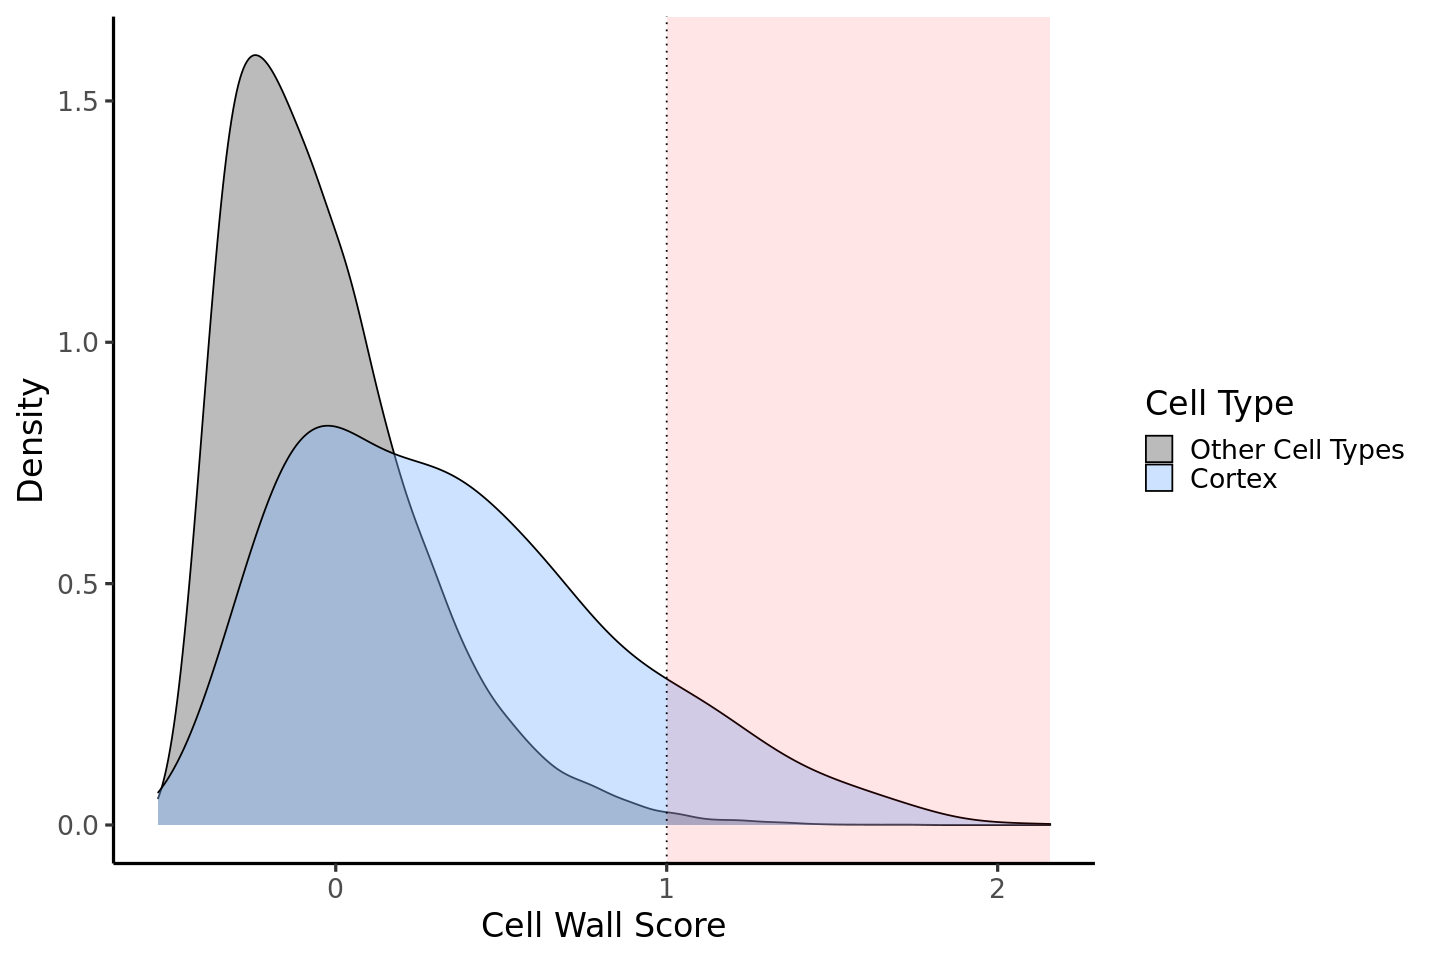

In [14]:
options(repr.plot.width=12, repr.plot.height=8)

# set limits just outside min and max scores
cw_min <- min(cw_scores$Cell_Wall_Score)
cw_min <- cw_min - 0.0001
cw_max <- max(cw_scores$Cell_Wall_Score)
cw_max <- cw_max + 0.0001

#plot density plots
cortex_density <- ggplot(data=cw_scores, aes(x=Cell_Wall_Score, group=cortex_or_not, fill=cortex_or_not)) +
    geom_density(adjust=1.5, alpha=.4) + theme_classic(base_size = 20) + scale_fill_manual(values = c("#565656", "#82B6FF")) + 
  annotate("rect", xmin = 1, xmax = cw_max, ymin = -Inf, ymax = Inf,
           alpha = .1,fill = "red") + labs(fill = "Cell Type") + 
scale_x_continuous(limits=c(cw_min, cw_max)) + geom_vline(xintercept=c(1), linetype="dotted") + xlab("Cell Wall Score") + ylab("Density")

cortex_density 

In [15]:
order = c("Maturation","Elongation", "Transition Domain", "Proliferation Domain")
cols = rev(c('#F7E7B0','#FFC400','#2B871F','#005E3B'))

In [16]:
cortex_cw_scores <- filter(cw_scores, cortex_or_not=="Cortex")
cortex_cw_scores$time_anno <- fct_relevel(cortex_cw_scores$time_anno, order)
(cortex_cw_scores <- mutate(cortex_cw_scores, plus = case_when(Cell_Wall_Score >=1 ~ "Cortex Cell Wall +",  
                                       TRUE ~ "Cortex Cell Wall -")))

,time_trt,time_anno,cell_type,Cell_Wall_Score,cortex_or_not,plus
,<fct>,<fct>,<fct>,<dbl>,<fct>,<chr>
AAACCCACAAGCAATA_5,BRZ,Maturation,Cortex,-0.35722002,Cortex,Cortex Cell Wall -
AAAGAACAGAGGTGCT_5,BRZ,Transition Domain,Cortex,0.55176350,Cortex,Cortex Cell Wall -
AAAGAACAGTCGTTAC_5,BRZ,Proliferation Domain,Cortex,-0.29818234,Cortex,Cortex Cell Wall -
AAAGGATTCACCTCTG_5,BRZ,Elongation,Cortex,0.32982160,Cortex,Cortex Cell Wall -
AAAGGGCGTGAGACCA_5,BRZ,Elongation,Cortex,-0.15661247,Cortex,Cortex Cell Wall -
AAAGGTACAGACCTAT_5,BRZ,Maturation,Cortex,0.01000867,Cortex,Cortex Cell Wall -
AACAAGACAAGGCGTA_5,BRZ,Elongation,Cortex,0.46122330,Cortex,Cortex Cell Wall -
AACACACAGCAGCACA_5,BRZ,Transition Domain,Cortex,0.65666085,Cortex,Cortex Cell Wall -
AACCAACGTCTACGTA_5,BRZ,Elongation,Cortex,-0.03089183,Cortex,Cortex Cell Wall -


In [17]:
total_cortex <- cortex_cw_scores %>%
group_by(time_trt) %>%
tally() %>%
rename(total=n)

cortex_plus <- cortex_cw_scores %>%
filter(plus=="Cortex Cell Wall +") %>%
group_by(time_trt) %>%
tally() %>%
rename(plus_all=n)

(total_cortex <- left_join(total_cortex, cortex_plus) %>%
mutate(percent_plus=(plus_all/total * 100)))

Joining, by = "time_trt"



time_trt,total,plus_all,percent_plus
<fct>,<int>,<int>,<dbl>
BRZ,905,28,3.093923
BL 0.5 hour,572,41,7.167832
BL 1 hour,374,27,7.219251
BL 2 hour,1225,279,22.775510
BL 4 hour,640,94,14.687500
BL 8 hour,571,33,5.779335


In [18]:
cortex_plus_zone <- cortex_cw_scores %>%
filter(plus=="Cortex Cell Wall +") %>%
group_by(time_trt, time_anno) %>%
tally() %>%
rename(plus_zone=n)

cortex_plus_zone

time_trt,time_anno,plus_zone
<fct>,<fct>,<int>
BRZ,Elongation,1
BRZ,Transition Domain,27
BL 0.5 hour,Elongation,12
BL 0.5 hour,Transition Domain,29
BL 1 hour,Elongation,7
BL 1 hour,Transition Domain,20
BL 2 hour,Elongation,148
BL 2 hour,Transition Domain,130
BL 2 hour,Proliferation Domain,1


In [19]:
(total_cortex_zone <- left_join(total_cortex, cortex_plus_zone, by="time_trt") %>%
mutate(percent_plus_zone=(plus_zone/total * 100), 
      type="Cortex"))


time_trt,total,plus_all,percent_plus,time_anno,plus_zone,percent_plus_zone,type
<fct>,<int>,<int>,<dbl>,<fct>,<int>,<dbl>,<chr>
BRZ,905,28,3.093923,Elongation,1,0.11049724,Cortex
BRZ,905,28,3.093923,Transition Domain,27,2.98342541,Cortex
BL 0.5 hour,572,41,7.167832,Elongation,12,2.09790210,Cortex
BL 0.5 hour,572,41,7.167832,Transition Domain,29,5.06993007,Cortex
BL 1 hour,374,27,7.219251,Elongation,7,1.87165775,Cortex
BL 1 hour,374,27,7.219251,Transition Domain,20,5.34759358,Cortex
BL 2 hour,1225,279,22.775510,Elongation,148,12.08163265,Cortex
BL 2 hour,1225,279,22.775510,Transition Domain,130,10.61224490,Cortex
BL 2 hour,1225,279,22.775510,Proliferation Domain,1,0.08163265,Cortex


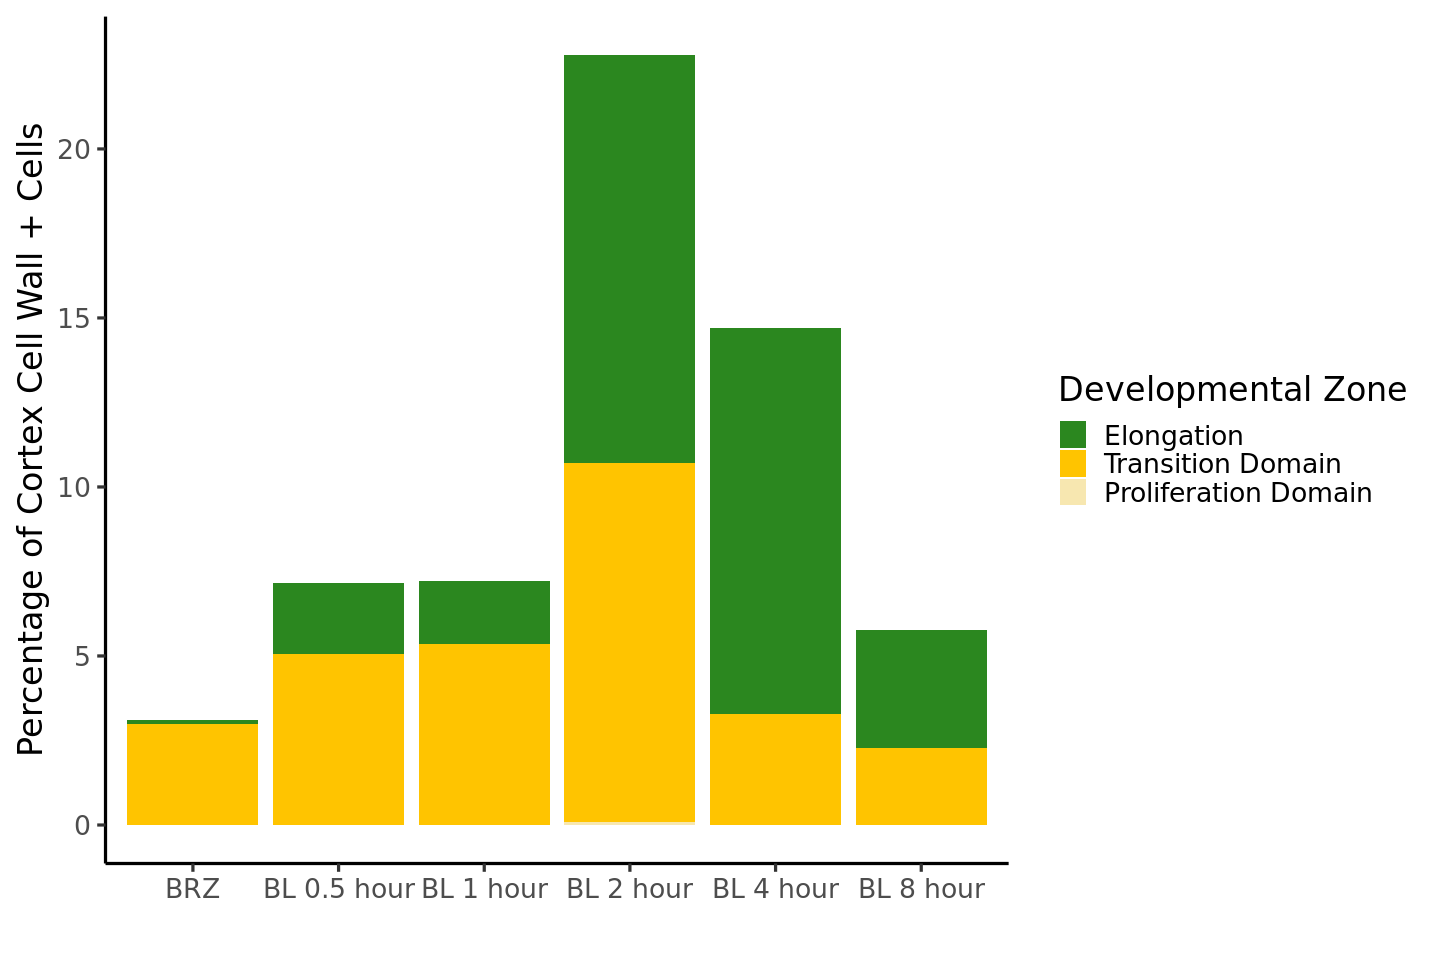

In [20]:
options(repr.plot.width=12, repr.plot.height=8)
# Grouped
(dev_bar <- ggplot(total_cortex_zone, 
       aes(fill=time_anno, 
           y=percent_plus_zone, 
           x=time_trt)) + 
    geom_bar(position="stack", 
             stat="identity") + 
scale_fill_manual(values =  rev(c('#F7E7B0','#FFC400','#2B871F')), name="Developmental Zone") +
theme_classic(base_size = 20) + 
xlab("") + 
ylab("Percentage of Cortex Cell Wall + Cells"))

In [21]:
# proportion of cell wall scores for other cell types

other_cw_scores <- filter(cw_scores, cortex_or_not!="Cortex") %>%
mutate(plus = case_when(Cell_Wall_Score >=1 ~ "Cortex Cell Wall +",  
                                       TRUE ~ "Cortex Cell Wall -"))

In [22]:
total_other <- other_cw_scores %>%
group_by(time_trt) %>%
tally() %>%
rename(total=n)

other_plus <- other_cw_scores %>%
filter(plus=="Cortex Cell Wall +") %>%
group_by(time_trt) %>%
tally() %>%
rename(plus_all=n)

(total_other <- left_join(total_other, other_plus) %>%
mutate(percent_plus=(plus_all/total * 100)))

Joining, by = "time_trt"



time_trt,total,plus_all,percent_plus
<fct>,<int>,<int>,<dbl>
BRZ,13056,6,0.04595588
BL 0.5 hour,6271,19,0.30298198
BL 1 hour,5962,9,0.15095606
BL 2 hour,11260,169,1.50088810
BL 4 hour,6267,30,0.47869794
BL 8 hour,5818,8,0.13750430


In [23]:
other_plus_zone <- other_cw_scores %>%
filter(plus=="Cortex Cell Wall +") %>%
group_by(time_trt, time_anno) %>%
tally() %>%
rename(plus_zone=n)

In [24]:
(total_other_zone <- left_join(total_other, other_plus_zone, by="time_trt") %>%
mutate(percent_plus_zone=(plus_zone/total * 100), 
      type="Other Cell Types") %>%
arrange(desc(percent_plus_zone)))


time_trt,total,plus_all,percent_plus,time_anno,plus_zone,percent_plus_zone,type
<fct>,<int>,<int>,<dbl>,<chr>,<int>,<dbl>,<chr>
BL 2 hour,11260,169,1.50088810,Elongation,75,0.666074600,Other Cell Types
BL 2 hour,11260,169,1.50088810,Transition Domain,71,0.630550622,Other Cell Types
BL 4 hour,6267,30,0.47869794,Elongation,18,0.287218765,Other Cell Types
BL 0.5 hour,6271,19,0.30298198,Transition Domain,12,0.191357040,Other Cell Types
BL 2 hour,11260,169,1.50088810,Proliferation Domain,21,0.186500888,Other Cell Types
BL 4 hour,6267,30,0.47869794,Transition Domain,8,0.127652784,Other Cell Types
BL 1 hour,5962,9,0.15095606,Transition Domain,6,0.100637370,Other Cell Types
BL 8 hour,5818,8,0.13750430,Transition Domain,5,0.085940186,Other Cell Types
BL 4 hour,6267,30,0.47869794,Proliferation Domain,4,0.063826392,Other Cell Types


In [25]:
# only examine transition and elongation since onthers make up small proportion

cortex_and_other_zone <- bind_rows(total_cortex_zone, total_other_zone) %>%
filter(time_anno %in% c("Transition Domain", "Elongation"))

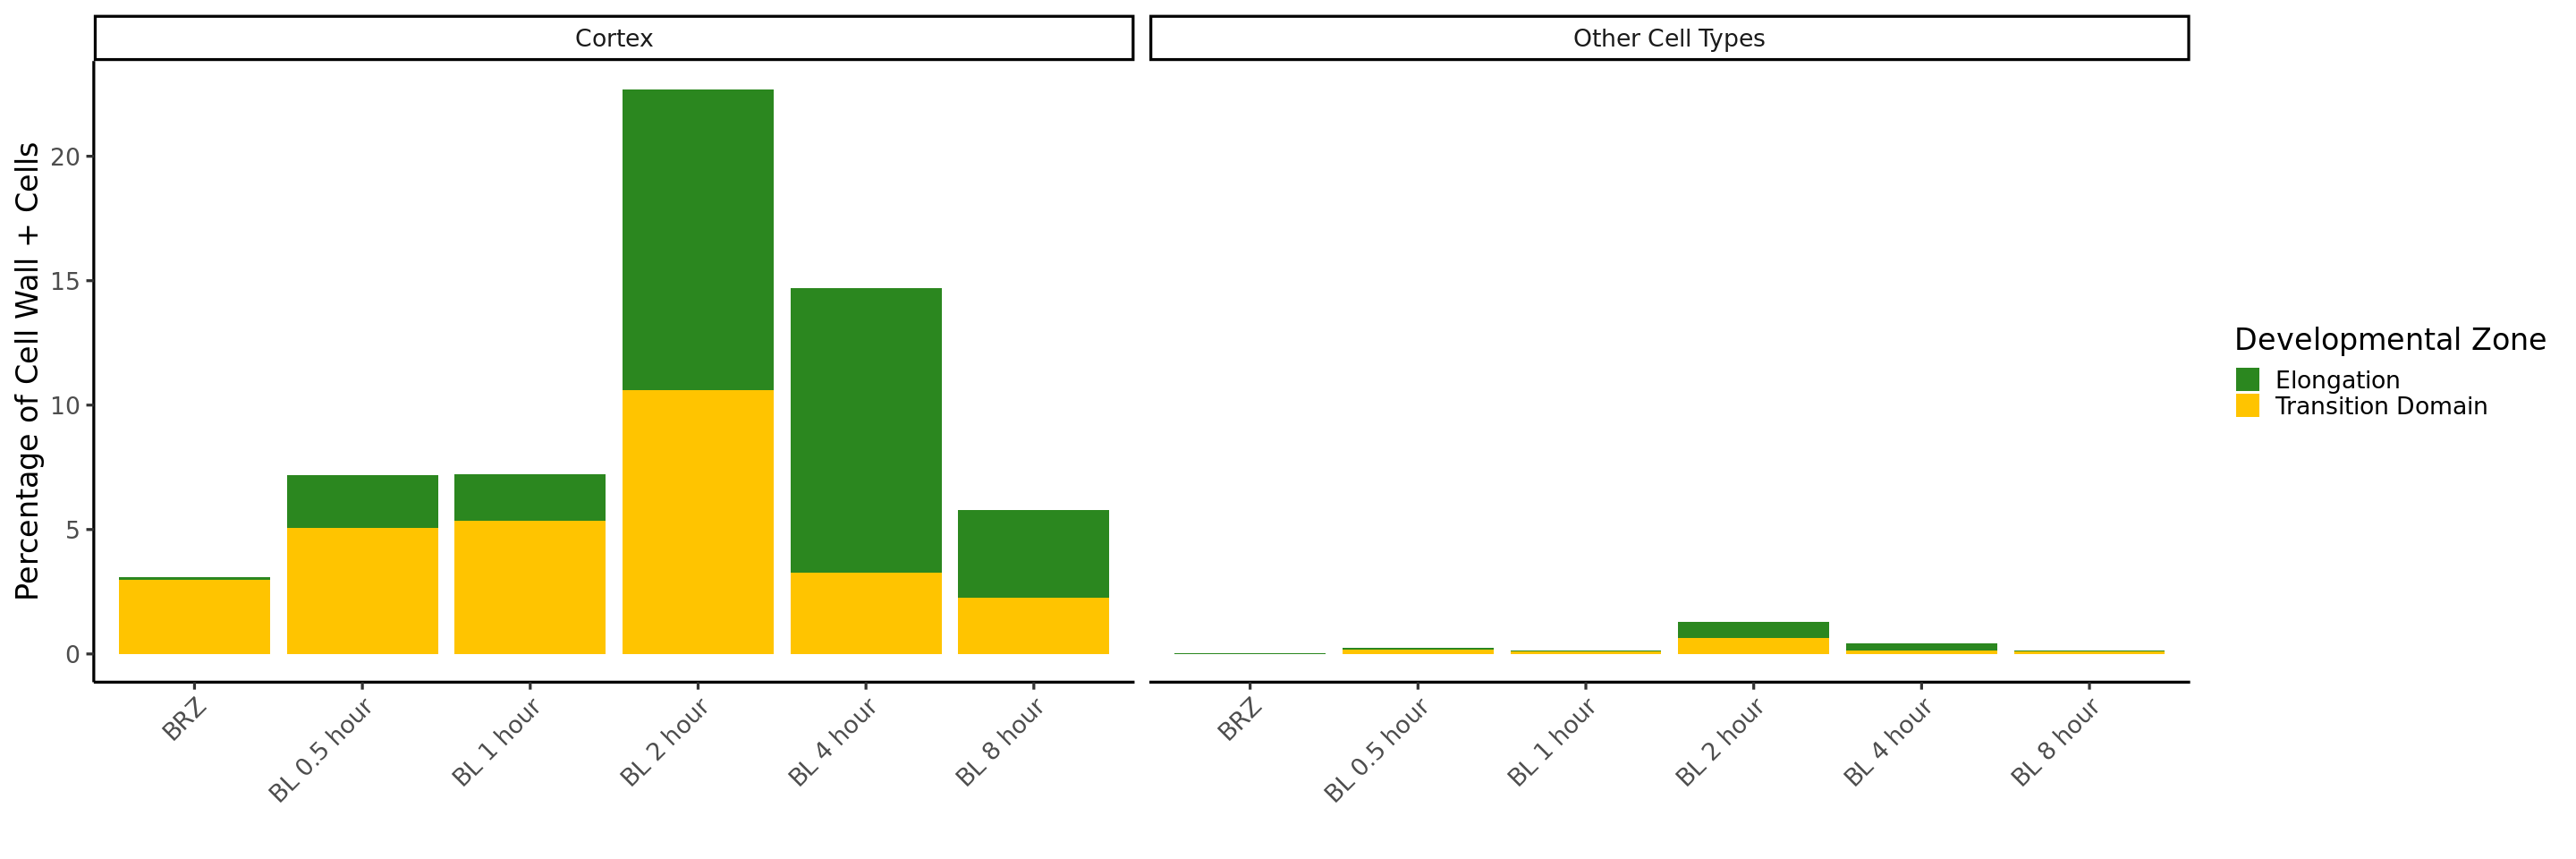

In [26]:
options(repr.plot.width=24, repr.plot.height=8)
# Grouped
(dev_bar_fac <- ggplot(cortex_and_other_zone, 
       aes(fill=time_anno, 
           y=percent_plus_zone, 
           x=time_trt)) + 
    geom_bar(position="stack", 
             stat="identity") + 
scale_fill_manual(values =  rev(c('#F7E7B0','#FFC400','#2B871F')), name="Developmental Zone") +
theme_classic(base_size = 20) + 
xlab("") + 
ylab("Percentage of Cell Wall + Cells") + 
 facet_grid(.~type) + 
theme(axis.text.x = element_text(angle = 45, hjust = 1)))

In [27]:
#plot density plots
cortex_density <- ggplot(data=cw_scores, aes(x=Cell_Wall_Score, group=cortex_or_not, fill=cortex_or_not)) +
    geom_density(adjust=1.5, alpha=.4) + theme_classic(base_size = 20) + scale_fill_manual(values = c("#565656", "#82B6FF")) + 
  annotate("rect", xmin = 1, xmax = cw_max, ymin = -Inf, ymax = Inf,
           alpha = .1,fill = "red") + labs(fill = "Cell Type") + 
scale_x_continuous(limits=c(cw_min, cw_max)) + geom_vline(xintercept=c(1), linetype="dotted") + xlab("Cell Wall Gene Expression Score") + ylab("Density") +  theme(legend.position = "none")

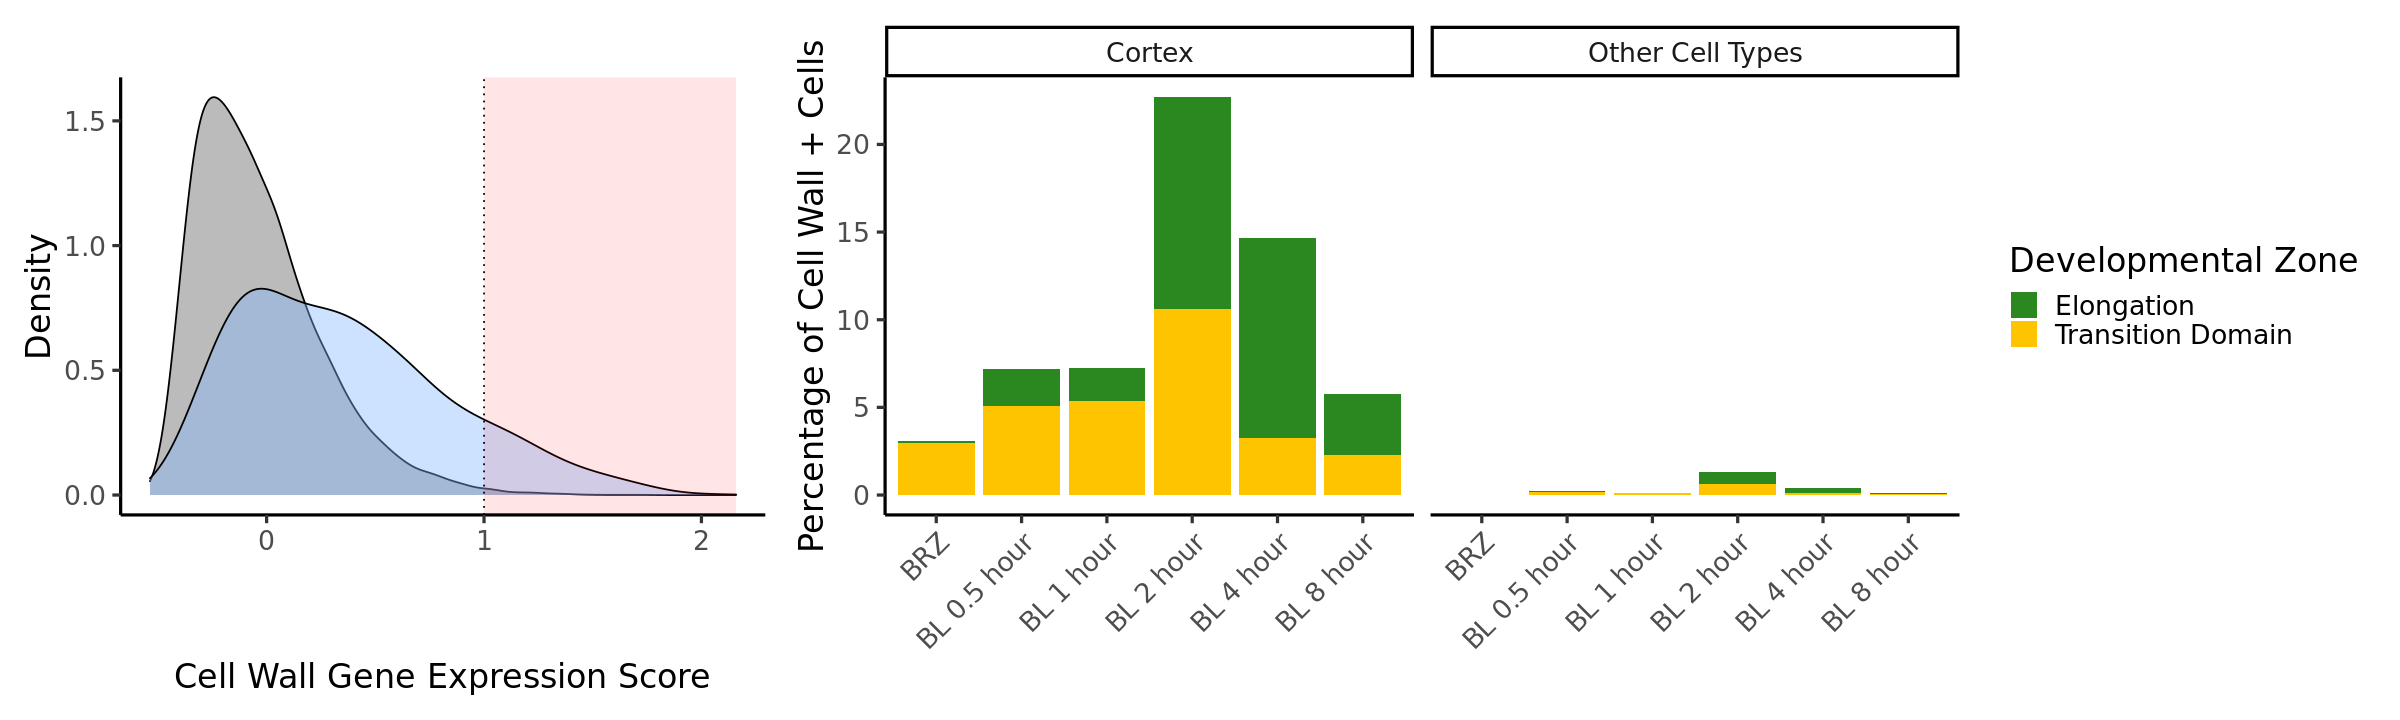

In [28]:
options(repr.plot.width=20, repr.plot.height=6)

cortex_density + dev_bar_fac + plot_layout(widths = c(0.6, 1))
ggsave("./output/Cell_wall_and_cortex_plot_single_density.pdf", width=20, height=6)